# Introduction

The goal of this project is to analyze the biodiversity data from the National Parks Service, particulary around various species in different national parks and locations.

This project is intended to scope, analyze, prepare and plot data, and seek to explain the findings from this analysis.

Here are some questions that this project seeks to answer:

- What is the distribution of conservation status for animal species?
- Are certain types of species more likely to be endangered?
- Which species were spotted the most and ther distribution amongst parks?



**Data Sources:**

`observations.csv` and `species_info.csv` were provided by [Codecademy.com](https://www.codecademy.com) learning platform.

Please note: The data for this project is *inspired* by real world data, but is mostly fictional.

## Scoping the Project

Four sections were created below to help guide the project's process and progress. The first section is *Project Goals*, this section will define the objectives and set the intentions for this project. The next section is the *Data* (data is already provided but still needs to be checked if it can meet the project goals). Thirdly, the *Analysis*, which includes the methods and questions that align with the project goals. Lastly, *Evaluation* will help us make conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks.

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Some of the key metrics that will be computed include: 

1. Distributions
1. Counts
1. Relationship between species
1. Conservation status of species
1. Observations of species in parks

### Evaluation

Revisiting the goals and checking if the output of the analysis corresponds to the questions first set to be answered (the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered.

## Import Python Modules

Import of the primary modules that will be used in this project:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from itertools import chain
import string

## Data Loading

To analyze the status of conservation of species and their observations in national parks, the datasets are loaded into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `species_info.csv` and `observations.csv` are read in as `DataFrames` called `species` and `observations` respectively. The newly created `DataFrames` are inspected with `.head()` and `.info()` to check its contents and shape&dimensions.

In [2]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

### Species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Species - Data Characteristics

Checking the dimesions of the dataset, for `species` there are 5,824 rows and 4 columns.

In [4]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


### Observations

The `observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [5]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Observations - Data Characteristics

Checking the dimesions of the dataset, for `observations` there are 23,296 rows and 3 columns.

In [6]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


## Explore the Data

Explloring the `species` data a little more in depth. The first thing is to find the number of distinct species in the data. Using the column `scientific_name` to get 5,541 unique species. There seems to be a lot of species in the national parks!

In [7]:
print(f"number of species: {species.scientific_name.nunique()}")

number of species: 5541


Next is to find the number of `category` that are represented in the data and there are 7 including animals and plants.

In [8]:
print(f"number of categories: {species.category.nunique()}")
print(f"categories: {species.category.unique()}")

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Going one level deeper to see the count of `category` in the data. Vascular plants are by far the largest share of species with 4,470 in the data with reptiles being the fewest with 79.

In [9]:
species.groupby('category').size().sort_values(ascending=False)

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
dtype: int64

Another column to explore is `conservation_status`. The column has 4 categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and  `nan` (empty) values. 

In [10]:
print(f"number of conservation statuses: {species.conservation_status.nunique()}")
print(f"unique conservation statuses: {species.conservation_status.unique()}")

number of conservation statuses: 4
unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Next a count of the number of observations in the breakdown of the categories in `conservation_status` is done. There are 5,633 `nan` values which means that they are species *without concerns*. On the other hand there are `161` species of concern, `16` endangered, `10` threatened, and `4` in recovery. 

Note: In most cases coming across `nan` values must be treated carefully, but the absence of data here means that these species are not under any conservation status.

In [11]:
print(species.groupby('conservation_status').size())
print(f"na values: {species.conservation_status.isna().sum()}")

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
na values: 5633


### Observations

The next section looks at `observations` data. The first task is to check the number of parks that are in the dataset and there are only 4 national parks.

In [12]:
print(f"number of national parks: {observations.park_name.nunique()}")
print(f"unique national parks: {observations.park_name.unique()}")

number of national parks: 4
unique national parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Here is the total number of observations logged in the parks. There are 3,314,739 sightings in the last 7 days.

In [42]:
print(f"number of observations:{observations.observations.sum()}")

number of observations:3314739


## Analysis

Analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`.

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment
- `Endangered`: at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently not in danger

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `Without concern`.

In [13]:
species.conservation_status[species['conservation_status'].isnull()] = "Without concern"

In [14]:
species.groupby("conservation_status").size().sort_values(ascending=False)

conservation_status
Without concern       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. There is the table and chart to explore below.

In the `Endangered` status, 7 were mammals and 4 were birds.

In the `In Recovery` status, there were 3 birds and 1 mammal.

This could possibly mean that the birds are bouncing back more than the mammals. 

In [15]:
conservation_category = species[species.conservation_status != "Without concern"]\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count().unstack()

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Conservation Status')

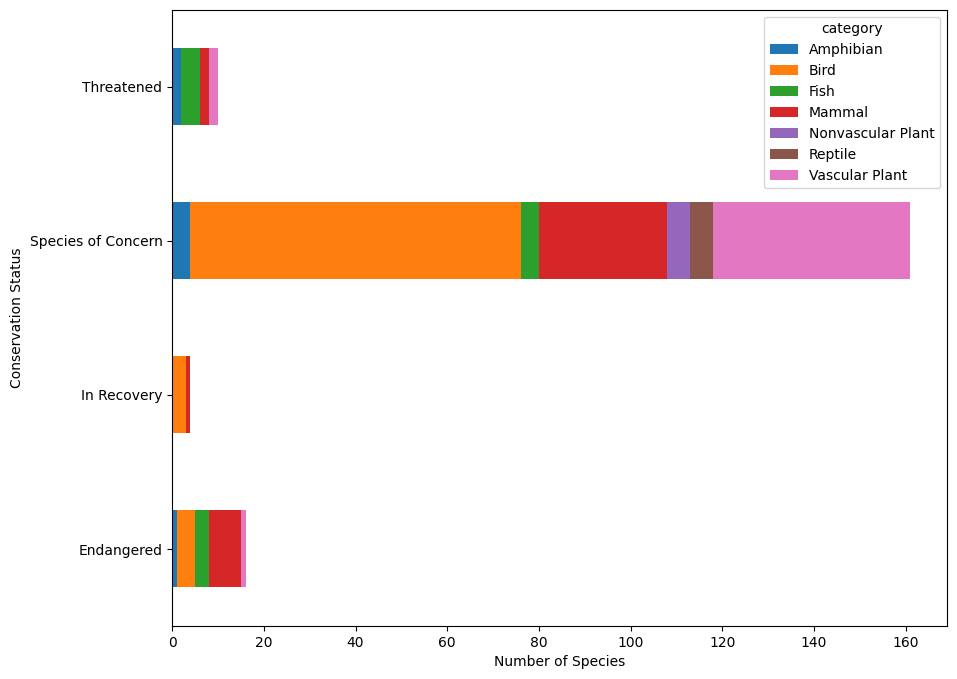

In [16]:
ax = conservation_category.plot(kind='barh', figsize=(10, 8), stacked=True)
ax.set_xlabel("Number of Species")
ax.set_ylabel("Conservation Status")

### In Conservation

The next question is if certain types of species are more likely to be endangered? Creating a new column called `is_protected` and including species that have a value other than `Without concern` can help us answer this question.

In [18]:
species['is_protected'] = species.conservation_status != 'Without concern'

Grouping by `category` and `is_protected` to show the break down of each species type and their protection status.

Birds, Mammals and Vascular Plants have a higher number of species protected.

In [43]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Calculating the rate of protection that each category exhibits in the data (since absolute number are not always showing the clear picture of what's happening). 

We can now see that `~ 17%` of mammals were under protection, as well as `~15%` of the birds. However, Vascular Plans are at `~1%`.

In [20]:
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Species in Parks

The next set of analysis will come from the conservationist data as they have been recording sightings of different species at four national parks for the past 7 days.

The first step is looking at the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be split into individual names.

In [23]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species[species.category == 'Mammal']\
    .common_names.apply(remove_punctuations)\
    .str.split().tolist()

common_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Cleaning up duplicate words in each row since they should be counted only once per species.

In [25]:
cleanRows = []

for item in common_names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Collapsing the words into one list for easier use.

In [27]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

The data is now ready to be able to count the number of occurences of each word.

From this analysis:
`Bat` occured 23 times
`Shrew` came up 18 times.

In [31]:
counted_words = []

for i in res:
    x = res.count(i)
    counted_words.append((i, x))

pd.DataFrame(set(counted_words), columns = ['Word', 'Count']).sort_values('Count', ascending= False).head(10)

,Word,Count
189,Bat,23
144,Shrew,18
14,Myotis,17
182,Mouse,16
162,Chipmunk,13
96,American,12
132,Squirrel,12
4,Vole,11
87,Eastern,11
114,Western,10


In the data, there are several different scientific names for different types of bats.  The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [32]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Without concern,False,False
1,Mammal,Bos bison,"American Bison, Bison",Without concern,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Without concern,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Without concern,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Without concern,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Without concern,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Without concern,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Here is a subset of the data where `is_bat` is true. There seems to be a lot of species of bats and a mix of protected vs non-protected species. 

In [33]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,Without concern,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",Without concern,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,Without concern,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,Without concern,False,True


The results of the bat species are merged with `observations` data to create a `DataFrame` with observations of bats across the four national parks.

In [34]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Without concern,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Total number of bat observations(across all species) at each national park presented in the table below.
Yellowstone National Park has the largest number of observations - `8,362`, and the Great Smoky Mountains National Park has the lowest number of observations - `2,411`.

In [38]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Diving deeper with protected bats vs non-protected bats sightings. 

Every park except for the Great Smoky National Park has more sightings of protected bats than non-protected. This could be considered a good sign for bats.

In [40]:
observations_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
observations_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Below is a plot from the output of the last data manipulation.

From this chart one can see that Yellowstone and Bryce National Parks seem to be doing a great job with their bat populations since there are more sightings of protected bats compared to non-protected species. The Great Smoky Mountains National Park might need to improve their efforts in conservation as they have seen more non-protected species.

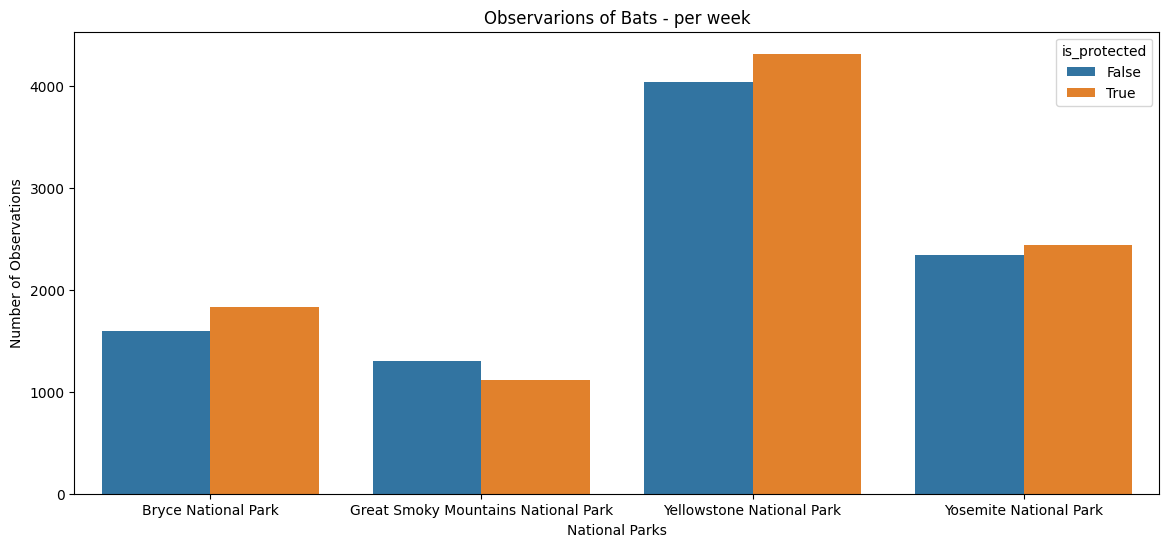

In [41]:
plt.figure(figsize = (14, 6))
sb.barplot(x= observations_by_park.park_name, y = observations_by_park.observations, hue=observations_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observarions of Bats - per week')
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks this dataset was made of.

The questions first posted in the beginning were answered:

- What is the distribution of conservation status for animal species?
    - The vast majority of species were not part of conservation.(`5,633` vs `191`)
- Are certain types of species more likely to be endangered?
    - `Mammals` and `Birds` had the highest percentage of being in protection.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that `bats` occurred the most number of times and they were most likely to be found in Yellowstone National Park.

## Further Research

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Also, what is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity.